In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

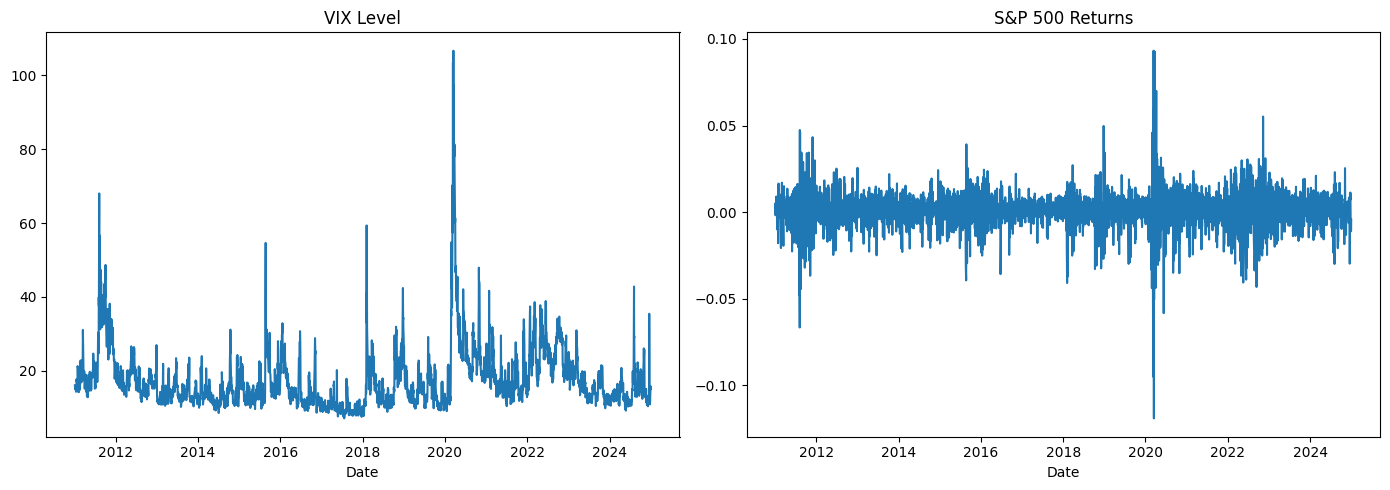

In [31]:
vix_df = pd.read_csv('VIX_SP.csv', parse_dates=['DATE'], index_col='DATE')
vix_df.head(5)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(vix_df.index, vix_df['VIX'])
axes[0].set_title('VIX Level')
axes[0].set_xlabel('Date')

axes[1].plot(vix_df.index, vix_df['ret'])
axes[1].set_title('S&P 500 Returns')
axes[1].set_xlabel('Date')

plt.tight_layout()
plt.show()

# Q1 A
---
Fitting GARCH (1,1) 

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4465.09
Distribution:                  Normal   AIC:                           8938.18
Method:            Maximum Likelihood   BIC:                           8962.84
                                        No. Observations:                 3521
Date:                Thu, Feb 19 2026   Df Residuals:                     3520
Time:                        21:56:00   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0869  1.248e-02      6.958  3.440e-12 [6.241e-0

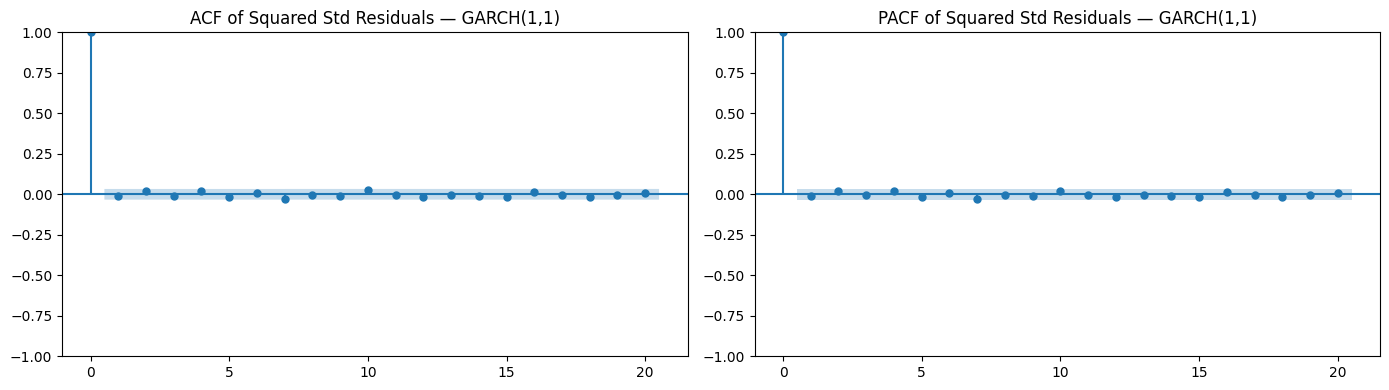


Ljung-Box test on squared standardized residuals:
      lb_stat  lb_pvalue
5    3.828951   0.574296
10   8.900854   0.541538
15  11.137011   0.742823
20  13.493442   0.855224


In [32]:
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox

ret = vix_df['ret'].dropna() * 100

garch11 = arch_model(ret, mean='Constant', vol='Garch', p=1, q=1, dist='gaussian')
res11 = garch11.fit(disp='off')

print(res11.summary())

# --- Squared standardized residuals diagnostics ---
std_resid = res11.resid / res11.conditional_volatility
std_resid_sq = std_resid ** 2

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(std_resid_sq, lags=20, ax=axes[0], title='ACF of Squared Std Residuals — GARCH(1,1)')
plot_pacf(std_resid_sq, lags=20, ax=axes[1], title='PACF of Squared Std Residuals — GARCH(1,1)')
plt.tight_layout()
plt.show()

# Ljung-Box test
lb = acorr_ljungbox(std_resid_sq, lags=[5, 10, 15, 20], return_df=True)
print('\nLjung-Box test on squared standardized residuals:')
print(lb)

# Q1 B
---


In [33]:
vix_df['Monday'] = (vix_df.index.dayofweek == 0).astype(int)
vix_df

,VIX,ret,Monday
DATE,,,
2011-01-04,16.06,-0.001236,0
2011-01-05,15.57,0.005164,0
2011-01-06,15.71,-0.001715,0
2011-01-07,15.01,-0.001755,0
2011-01-10,15.81,-0.001549,1
...,...,...,...
2024-12-24,10.89,0.011335,0
2024-12-26,11.63,-0.000392,0
2024-12-27,13.31,-0.011109,0
